 ## Car Licence detection via OCR (Optical Character Recognition) ##
Created by student


---



---




Our project conveys the use of OCR (Optical Character Recognition) with Artificial Intelligence.

This program scans and reads the number plate of a car and it writes it down as text and stores the characters and numbers as a string.


In [3]:
#We are downloading easyocr to our environment
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To run this program without any interruption, we need to introduce some of the libraries like 




1.   **Easy-ORC:** (Used for text detection from an image, in python.)

2.   **opencv-python(cv2):** (It is used for manipulation of images in python.)
3.   **numpy:** (Open-source numerical python library; used for performing     number of mathematical operations.)

4.   **google.colab.patches:** (active visualizations in python, used to show images in Jupyter notebook as a plot because **direct images cannot be manipulated in jupyter notebook**.)










In [4]:
from google.colab.patches import cv2_imshow
import easyocr
import cv2 #opencv-python
import matplotlib.pyplot as plt
import numpy 

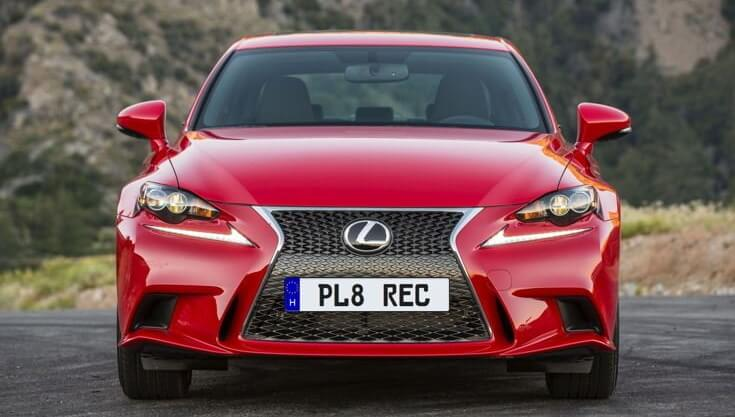

In [5]:
# Read the image file
image = cv2.imread(r'/content/Project Image 2.jpg')
cv2_imshow(image)

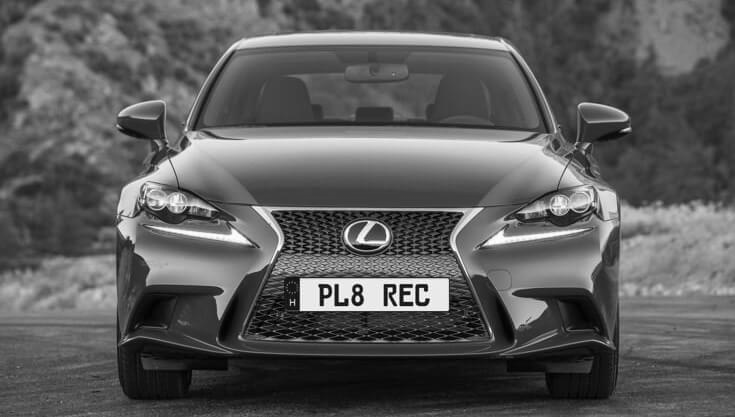

In [6]:
# Convert to Grayscale Image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

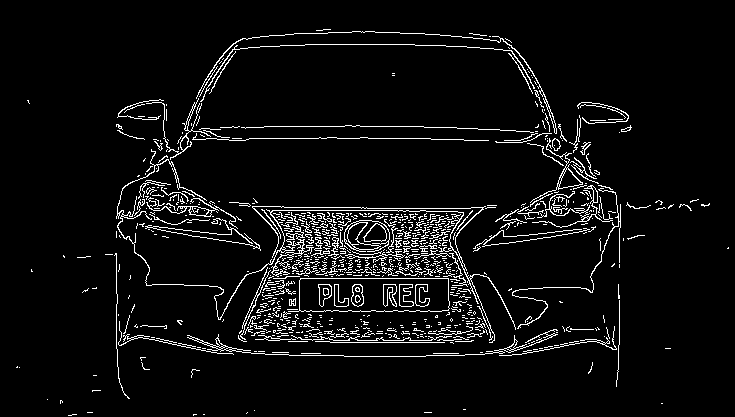

In [7]:
#Canny Edge Detection
canny_edge = cv2.Canny(gray_image, 170, 200)
cv2_imshow(canny_edge)

In [8]:
# Find contours based on Edges
contours, new  = cv2.findContours(canny_edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:30]

In [9]:
# Initialize license Plate contour and x,y coordinates
contour_with_license_plate = None
license_plate = None
x = None
y = None
w = None
h = None


In [10]:
# Find the contour with 4 potential corners and creat ROI around it
for contour in contours:
        # Find Perimeter of contour and it should be a closed contour
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.01 * perimeter, True)
        if len(approx) == 4: #see whether it is a Rect
            contour_with_license_plate = approx
            x, y, w, h = cv2.boundingRect(contour)
            license_plate = gray_image[y:y + h, x:x + w]
            break

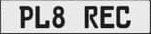

In [11]:
#checking whether python find ROI sucessfully
try:
  cv2_imshow(license_plate)
except TypeError:
  print("This picture is not in correct dimension")


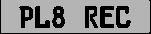

In [12]:
# Removing Noise from the detected image, before sending to EasyOcr
license_plate = cv2.bilateralFilter(license_plate, 11, 17, 17)
(thresh, license_plate) = cv2.threshold(license_plate, 150, 180, cv2.THRESH_BINARY)
cv2_imshow(license_plate)

In [13]:
# downloading some standard model to text evaluation
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [14]:
#output save actual text in string format
output = reader.readtext(license_plate)

In [15]:
#output in raw format 
output

[([[16, 2], [70, 2], [70, 34], [16, 34]], 'PL8', 0.9774274467567179),
 ([[82, 2], [136, 2], [136, 34], [82, 34]], 'REC', 0.9998338570549938)]

In [16]:
#extrating text in string format
text=''
for i in output:
  text=text+i[-2]

In [17]:
# puting that text in image with bigger size
image = cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,255), 3) 
image = cv2.putText(image, text, (x-100,y-80), cv2.FONT_HERSHEY_SIMPLEX, 3, (225,225,0), 6, cv2.LINE_AA)

In [18]:
#printing license of car and presenting that  image
print("License Plate :", text)

License Plate : PL8REC


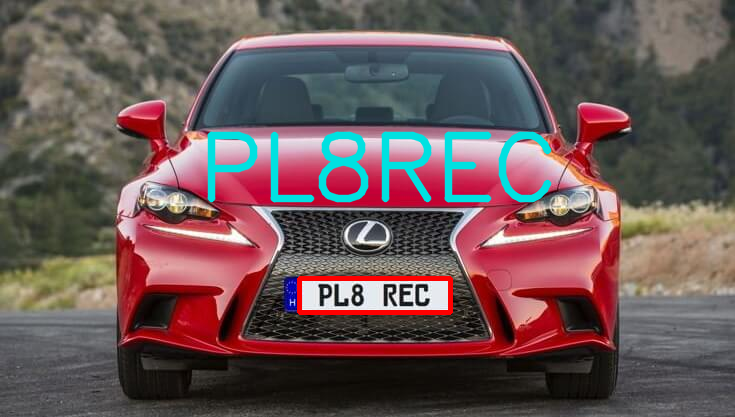

In [19]:
#Here we go!!

cv2_imshow(image)

## **Applications for this program are as follows:**

1. Verifying the ownership of the vehicle (Law 
   Enforcement Purposes).
2. Used at parking lots for the ease of finding someone’s vehicle.
3. Useful for faster processing of plate numbers at the service centers or at the Pollution Check Points.
4. Keeping the track of vehicles passed at the toll points at National and Express Highways 
5. Security Purposes (Automatic Registration of Vehicle Number Plate via CCTV Footages)
6. Reduction of the amount of Paperwork
